In [2]:
# !pip install abc-analysis
# !pip install sklearn
# !pip install sklearn
# !pip install xgboost

# Delay_ABC

The column **Delay_ABC** is determined by dividing the range of **NormalizedDelay**>0 based on the Pareto Principle by using the ABC Analysis. This is done by classifying the delays in these categories:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** belonging to category **A** on the ABC Analysis

2: Contracts with **NormalizedDelay** belonging to category **B** on the ABC Analysis

3: Contracts with **NormalizedDelay** belonging to category **C** on the ABC Analysis

In [3]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Para realizar el análisis ABC
from abc_analysis import abc_analysis as abc

In [4]:
#Read data file obtained from datos.gov.co
# path = "C:/Users/User/Downloads/ds4a-secopII/" #path Carlos
path = "C:/Users/VMNR/Desktop/" #path vicman
# path = "../data/" #path GENERAL
# path = "../../git/secop-ds4a/dash_app/assets/csv/"   #path de la maquina
file_name = 'SECOP_Electronicos_Cleaned.csv'

#Select the columns that we want to parse as dates.
date_cols = ['Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato']

df = pd.read_csv(path+file_name, parse_dates=date_cols, low_memory=False)


In [5]:

print('The shape of the original dataset is : ' + str(df.shape))

The shape of the original dataset is : (1562161, 35)


In [6]:
# df.info()

In [7]:
cat_cols = ['Departamento', 'Orden', 'Sector', 'Rama','Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
            'Es Grupo','Es Pyme', 'Destino Gasto', 'EsPostConflicto', 'Delay']
cat_values = {key:'category' for key in cat_cols}
df = df.astype(cat_values)

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
# df.info()

In [10]:
df2 = df[df['Dias Adicionados']>0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231621 entries, 17 to 1562154
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Nombre Entidad                   231621 non-null  object        
 1   Departamento                     231621 non-null  category      
 2   Orden                            231621 non-null  category      
 3   Sector                           231621 non-null  category      
 4   Rama                             231621 non-null  category      
 5   Entidad Centralizada             231621 non-null  category      
 6   Estado Contrato                  231621 non-null  category      
 7   Tipo de Contrato                 231621 non-null  category      
 8   Modalidad de Contratacion        231621 non-null  category      
 9   Fecha de Inicio del Contrato     231621 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato        231621 no

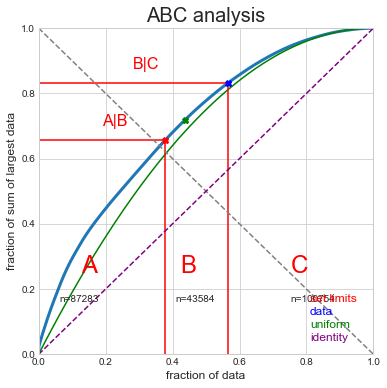

In [11]:
df_de_ABC = abc(df2['NormalizedDelay'], True)

In [12]:
#df_de_ABC

In [13]:
#Crear columna vacía
df['Delay_ABC'] = 0
# Categorías
limit_AB = df_de_ABC['ABLimit']
limit_BC = df_de_ABC['BCLimit'] + limit_AB
limit_AB,limit_BC


(0.3113636363636363, 0.5276645768025077)

## Intervalos

0:  **NormalizedDelay** = 0

1: 0 < **NormalizedDelay** $\leq$ 0.3113636363636363

2: 0.3113636363636363 < **NormalizedDelay** $\leq$ 0.5276645768025077

3:  **NormalizedDelay** > 0.5276645768025077

In [14]:
df['Delay_ABC'].sample(5)

448498     0
115307     0
1205019    0
779614     0
4374       0
Name: Delay_ABC, dtype: int64

In [15]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_AB), 'Delay_ABC'] = 1
df.loc[(df['NormalizedDelay'] > limit_AB) & (df['NormalizedDelay'] <= limit_BC), 'Delay_ABC']= 2
df.loc[(df['NormalizedDelay'] > limit_BC), 'Delay_ABC'] = 3

In [16]:
df[df.Delay_ABC==0].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
122515,INSTITUTO DISTRITAL DE PROTECCION Y BIENESTAR ...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2020-09-29,...,0,0,0,0,1,0,0,0,0.0,0


In [17]:
df[df.Delay_ABC==1].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
920690,SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,2022-02-16,...,15,0,0,0,0,1,0,1,0.12605,1


In [18]:
df[df.Delay_ABC==2].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
1537545,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,Valle del Cauca,Territorial,Ambiente y Desarrollo Sostenible,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2020-07-21,...,58,0,0,0,1,0,0,2,0.3625,2


In [19]:
df[df.Delay_ABC==3].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
1505427,DANE - DIRECCION TERRITORIAL CENTRO,"Bogotá, D.C.",Nacional,Información Estadística,Corporación Autónoma,Centralizada,Modificado,Prestación de servicios,Contratación directa,2020-08-19,...,132,1,0,0,0,0,0,3,0.992481,3


# Delay_EQ

The column **Delay_EQ** is determined by dividing the range of **NormalizedDelay**>0 which is (0,1] into equal intervals.
By that our categories below this criteria would be:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** $\leq$ 0.3333333333333333

2: Contracts with **NormalizedDelay** $\leq$ 0.6666666666666667

3: Contracts with **NormalizedDelay** > 0.6666666666666667

In [20]:
df['Delay_EQ'] = 0
limit_1 = 0.3333333333333333
limit_2 = 0.6666666666666667

In [21]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_1), 'Delay_EQ'] = 1
df.loc[(df['NormalizedDelay'] > limit_1) & (df['NormalizedDelay'] <= limit_2), 'Delay_EQ']= 2
df.loc[(df['NormalizedDelay'] > limit_2), 'Delay_EQ'] = 3

In [22]:
df.sample(10)

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC,Delay_EQ
609070,DISTRITO ESPECIAL INDUSTRIAL Y PORTUARIO DE BA...,Atlántico,Territorial,Servicio Público,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2021-03-05,...,0,0,0,1,0,0,0,0.000000,0,0
438167,MUNICIPIO DE SAN JOSE DE CUCUTA,Norte de Santander,Territorial,Servicio Público,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2021-08-31,...,0,0,0,1,0,0,0,0.000000,0,0
782892,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,"Bogotá, D.C.",Nacional,Trabajo,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2020-10-29,...,1,0,0,0,0,0,0,0.000000,0,0
449123,SANTIAGO DE CALI DISTRITO ESPECIAL - SECRETARI...,Valle del Cauca,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2022-01-20,...,0,0,0,1,0,0,0,0.000000,0,0
1014910,INSTITUTO DISTRITAL PARA LA PROTECCIÓN DE LA N...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2021-05-05,...,0,0,0,1,0,0,0,0.000000,0,0
750472,MUNICIPIO DE SANTA ROSA DE CABAL,Risaralda,Territorial,Servicio Público,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2021-06-01,...,0,0,0,1,0,0,0,0.000000,0,0
353546,Secretaria Distrital de Integración Social - O...,"Bogotá, D.C.",Territorial,Inclusión Social y Reconciliación,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2021-03-24,...,0,1,0,0,0,0,2,0.308390,1,1
1425906,COMANDO AÉREO DE COMBATE No. 1,Cundinamarca,Nacional,No aplica/No pertenece,Corporación Autónoma,Centralizada,Activo,Compraventa,Mínima cuantía,2019-07-08,...,0,0,0,0,0,0,0,0.000000,0,0
1321478,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,Modificado,DecreeLaw092/2017,Contratación régimen especial,2020-07-20,...,0,0,0,0,1,0,3,0.890756,3,3
410141,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO,"Bogotá, D.C.",Territorial,Industria,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2021-02-25,...,0,0,0,1,0,0,0,0.000000,0,0


In [23]:
#!pip install xgboost

In [24]:
# Importación y definición de modelo XGBClassifier

from xgboost import XGBClassifier
from sklearn import metrics 


# Modelo XGBoost-1 (Variable Delay)

In [25]:
y = df['Delay'].astype('category')
X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                            'Rama','Entidad Centralizada',
                                            'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                            'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                            'EsPostConflicto', 'Destino Gasto',
                                            'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

In [26]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [27]:

clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.5923242156234809, 0.9037601306657045)

# Modelo XGBoost-2 Variable Delay_ABC

In [29]:
# print(df.columns)

In [30]:
y = df['Delay_ABC'].astype('category')

In [31]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [32]:

clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.6120535911329996, 0.9071722591433017)

# Modelo XGBoost-3 Variable Delay_EQ

In [34]:
y = df['Delay_EQ'].astype('category')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [36]:
clf2 = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.6047590546102186, 0.9110945580527396)

# Modelo XGBoost-1 Ajustado con One Hot Encoding 

In [38]:
# X.info()

In [39]:
X = pd.get_dummies(X, drop_first=True)

In [40]:
y = df['Delay'].astype('category')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [42]:
clf2 = XGBClassifier()

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.5800027375823203, 0.9010928898148256)

# Modelo XGBoost-2 Ajustado con One Hot Encoding

In [44]:
y = df['Delay_ABC'].astype('category')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [46]:
clf2 = XGBClassifier()

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [47]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.5944275070063709, 0.9038241444461256)

Esto se hizo para comparar las particiones.

In [51]:
import numpy as np

In [52]:
np.mean(X_train.index)

780515.1612358321

In [53]:
y = df['Delay'].astype('category')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [55]:
np.mean(X_train.index)

780515.1612358321

## -------------------------------------------------------------------------------------------------------------

# Model XGBoost-4 $y$ = Delay ABC, $x$ = just categorical values

In [67]:
y = df['Delay_ABC'].astype('category')
X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                    'Rama','Entidad Centralizada',
                                    'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                    'Es Grupo','Es Pyme',
                                    'EsPostConflicto', 'Destino Gasto']]

In [68]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [69]:
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.47243442559758725, 0.8834677622722177)

# Model XGBoost-5 $y$ = Delay ABC, $x$ = just number values

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 36 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Nombre Entidad                   1562161 non-null  object        
 1   Departamento                     1562161 non-null  category      
 2   Orden                            1562161 non-null  category      
 3   Sector                           1562161 non-null  category      
 4   Rama                             1562161 non-null  category      
 5   Entidad Centralizada             1562161 non-null  category      
 6   Estado Contrato                  1562161 non-null  category      
 7   Tipo de Contrato                 1562161 non-null  category      
 8   Modalidad de Contratacion        1562161 non-null  category      
 9   Fecha de Inicio del Contrato     1562161 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato     

In [72]:
y = df['Delay_ABC'].astype('category')
X = df.drop(['Delay'], axis=1)[['Valor del Contrato', 'Valor de pago adelantado',
                                'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

In [73]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [74]:
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [75]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.2555759788712237, 0.8539865066710118)

# Model XGBoost-6x $y$ = Delay ABC, $x$ = All variables but one at the time

In [79]:
#df.Rama.unique

In [80]:
y = df['Delay_ABC'].astype('category')

In [81]:
# Cuidado con esta celda
# f1 = {}
# preX = df.drop(['Delay'], axis=1)[['Departamento', 'Orden','Sector',
#                             'Rama','Entidad Centralizada',
#                             'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
#                             'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
#                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
#                             'EsPostConflicto', 'Destino Gasto',
#                             'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

# def xgb_no_col(col):
#     X = preX.drop(col, axis=1)
#     # Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     n_samples = X_train.shape[0]
#     clf = XGBClassifier(tree_method="hist", enable_categorical=True)

#     # Entrenamiento (fit) y desempeño del modelo XGBClassifier
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     val = f1_score(y_pred, y_test.values, average= 'macro')
#     return val

# for i in preX.columns:
#     f1[i] = xgb_no_col(i)
    

In [82]:
f1

{'Orden': {'Orden': 0.5940113737409076},
 'Sector': {'Sector': 0.5778518423434043},
 'Rama': {'Rama': 0.5950230103446111},
 'Entidad Centralizada': {'Entidad Centralizada': 0.5938698714108586},
 'Estado Contrato': {'Estado Contrato': 0.3943225043723796},
 'Tipo de Contrato': {'Tipo de Contrato': 0.5884076755985277},
 'Modalidad de Contratacion': {'Modalidad de Contratacion': 0.595895148325488},
 'Es Grupo': {'Es Grupo': 0.5989313104633025},
 'Es Pyme': {'Es Pyme': 0.5981449598258602},
 'Valor del Contrato': {'Valor del Contrato': 0.5834713963489796},
 'Valor de pago adelantado': {'Valor de pago adelantado': 0.5978471228603323},
 'Valor Facturado': {'Valor Facturado': 0.5900617635682841},
 'Valor Pendiente de Pago': {'Valor Pendiente de Pago': 0.5941193008962493},
 'Valor Amortizado': {'Valor Amortizado': 0.5952229244472738},
 'EsPostConflicto': {'EsPostConflicto': 0.5977560436121007},
 'Destino Gasto': {'Destino Gasto': 0.5984565763807134},
 'PGN': {'PGN': 0.5958048479442903},
 'SGP': 

# Model XGBoost-7 $y$ = Delay ABC, $x$ = All variables and Days_to_end_of_years

In [120]:
df_aux = pd.DataFrame({'year': df['Fecha de Fin del Contrato'].dt.to_period('Y'), 'month': 12, 'day': 31})
df_aux.info()
df_aux.year = df_aux.year.dt.strftime('%Y').astype('int64')
df_aux.info()
df['Days_to_end_of_year'] = (pd.to_datetime(df_aux) - df['Fecha de Fin del Contrato']).dt.days.astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype        
---  ------  --------------    -----        
 0   year    1562161 non-null  period[A-DEC]
 1   month   1562161 non-null  int64        
 2   day     1562161 non-null  int64        
dtypes: int64(2), period[A-DEC](1)
memory usage: 35.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   year    1562161 non-null  int64
 1   month   1562161 non-null  int64
 2   day     1562161 non-null  int64
dtypes: int64(3)
memory usage: 35.8 MB


In [127]:
pd.to_datetime(df_aux)

0         2022-12-31
1         2020-12-31
2         2021-12-31
3         2018-12-31
4         2022-12-31
             ...    
1562156   2021-12-31
1562157   2021-12-31
1562158   2021-12-31
1562159   2021-12-31
1562160   2021-12-31
Length: 1562161, dtype: datetime64[ns]

In [95]:

X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                'Rama','Entidad Centralizada',
                                'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                    'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                'EsPostConflicto', 'Destino Gasto',
                                'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC', 'Duration']]

In [97]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [98]:
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [99]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.7238821112992415, 0.9255616724279069)

----------

In [123]:

X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                'Rama','Entidad Centralizada',
                                'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                    'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                'EsPostConflicto', 'Destino Gasto',
                                'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC', 'Days_to_end_of_year']]

In [124]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [125]:
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [126]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.7246628621594816, 0.9260117087023825)